# 5. Distance Measure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def four_connected(V, pix):
    connected= []
    row_mov= [0, 1]
    col_mov= [1, 0]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(2):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [3]:
def eight_connected(V, pix):
    connected= []
    row_mov= [-1, -1, 0, 1]
    col_mov= [0, 1, 1, 1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
    return connected

In [4]:
def M_connected(V, pix):
    connected= []
    row_mov= [-1, 0, 1, 0]
    col_mov= [0, 1, 0, -1]
    row_diag= [-1, 1, 1, -1]
    col_diag= [1, 1, -1, -1]
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                flag= []
                for k in range(4):
                    cur_r= i+ row_mov[k]
                    cur_c= j+ col_mov[k]
                    flag.append(False)
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        connected.append((i, j, cur_r, cur_c))
                        flag[k]= True
                flag= flag+ flag
                for k in range(4):
                    cur_r= i+ row_diag[k]
                    cur_c= j+ col_diag[k]
                    if cur_r>= 0 and cur_r< pix.shape[0] and cur_c>= 0 and cur_c< pix.shape[1] and pix[cur_r][cur_c] in  V:
                        if flag[k: k+2] ==[False, False]:
                            connected.append((i, j, cur_r, cur_c))
    return connected

In [5]:
def four_path_helper(data, p, q):
    row_mov4=[-1, 0, 1, 0]
    col_mov4= [0, 1, 0, -1]
    parent= {}
    queue= []
    queue.append(p)
    data[p[0]][p[1]]= 0
    while len(queue)>0:
        cur= queue.pop(0)
        for k in range(4):
            nxt_r= cur[0]+ row_mov4[k]
            nxt_c= cur[1]+ col_mov4[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                parent[(nxt_r, nxt_c)]= (cur[0], cur[1])
                data[nxt_r][nxt_c]= 0
                if q[0]== nxt_r and q[1]== nxt_c:
                    return parent
                queue.append((nxt_r, nxt_c))
                
    return {}

def four_path(V, pix, p, q):
    data= pix.copy()
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    
    parent= four_path_helper(data, p, q)
    if parent!= {}:
        path= []
        temp= tuple(q)
        path.append(q)
        while parent[temp]!= p:
            path.append(parent[temp])
            temp= parent[temp]
        path.append(p)
        new_path= list(path[::-1])
        return new_path
    return []

In [6]:
def eight_path_helper(data, p, q):
    row_mov8= [-1, 0, 1, 0,-1, 1, 1, -1]
    col_mov8= [0, 1, 0, -1, 1, 1, -1, -1]
    parent= {}
    queue= []
    queue.append(p)
    data[p[0]][p[1]]= 0
    while len(queue)>0:
        cur= queue.pop(0)
        for k in range(8):
            nxt_r= cur[0]+ row_mov8[k]
            nxt_c= cur[1]+ col_mov8[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                parent[(nxt_r, nxt_c)]= (cur[0], cur[1])
                data[nxt_r][nxt_c]= 0
                if q[0]== nxt_r and q[1]== nxt_c:
                    return parent
                queue.append((nxt_r, nxt_c))
                
    return {}
   
def eight_path(V, pix, p, q):
    data= pix.copy()
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    
    parent= eight_path_helper(data, p, q)
    if parent!= {}:
        path= []
        temp= tuple(q)
        path.append(q)
        while parent[temp]!= p:
            path.append(parent[temp])
            temp= parent[temp]
        path.append(p)
        new_path= list(path[::-1])
        return new_path
    return []

In [7]:
def M_path_helper(data, p, q):
    row_mov4=[-1, 0, 1, 0]
    col_mov4= [0, 1, 0, -1]
    row_diag= [-1, 1, 1, -1]
    col_diag= [1, 1, -1, -1]
    parent= {}
    queue= []
    queue.append(p)
    data[p[0]][p[1]]= 0
    while len(queue)>0:
        cur= queue.pop(0)
        flag= []
        for k in range(4):
            flag.append(False)
            nxt_r= cur[0]+ row_mov4[k]
            nxt_c= cur[1]+ col_mov4[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                flag[k]= True
                parent[(nxt_r, nxt_c)]= (cur[0], cur[1])
                data[nxt_r][nxt_c]= 0
                if q[0]== nxt_r and q[1]== nxt_c:
                    return parent
                queue.append((nxt_r, nxt_c))
        flag= flag+ flag
        for k in range(4):
            nxt_r= cur[0]+ row_diag[k]
            nxt_c= cur[1]+ col_diag[k]
            if nxt_r>= 0 and nxt_r< data.shape[0] and nxt_c>= 0 and nxt_c< data.shape[1] and data[nxt_r][nxt_c]==1:
                if flag[k: k+2] ==[False, False]:
                    parent[(nxt_r, nxt_c)]= (cur[0], cur[1])
                    data[nxt_r][nxt_c]= 0
                    if q[0]== nxt_r and q[1]== nxt_c:
                        return parent
                    queue.append((nxt_r, nxt_c))
                
    return {}
    
def M_path(V, pix, p, q):
    data= pix.copy()
    for i in range(pix.shape[0]):
        for j in range(pix.shape[1]):
            if pix[i][j] in V:
                data[i][j]= 1
            else:
                data[i][j]= 0
    
    parent= M_path_helper(data, p, q)
    if parent!= {}:
        path= []
        temp= tuple(q)
        path.append(q)
        while parent[temp]!= p:
            path.append(parent[temp])
            temp= parent[temp]
        path.append(p)
        new_path= list(path[::-1])
        return new_path
    return []

# User Matrix

In [8]:
V= np.array(list(map(int, input("Enter space separated allowed pixel values: ").split())))
V

Enter space separated allowed pixel values: 0 1


array([0, 1])

In [9]:
# n, m= map(int, input("Enter size of matrix(n, m): ").split())
# print("Enter matrix values: ")
# l= []
# for i in range(n):
#     _= np.array(list(map(int, input().split())))
#     l.append(_)
# pix= np.array(l)
pix= np.array([[3, 1, 2, 1], [2, 2, 0, 2], [1, 2, 1, 1], [1, 0, 1, 2]])

In [10]:
p= tuple(map(int, input("Enter starting point: ").split()))
q= tuple(map(int, input("Enter ending point: ").split()))

Enter starting point: 3 0
Enter ending point: 0 3


In [11]:
import math
print(f"Euclidean Distance: {math.sqrt((p[0]-q[0])**2+ (p[1]-q[1])**2)}")
print(f"Manhattan(City- Block) Distance: {abs(p[0]-q[0])+ abs(p[1]-q[1])} ")
print(f"Chess Board Distance: {max(abs(p[0]-q[0]), abs(p[1]- q[1]) )}")

Euclidean Distance: 4.242640687119285
Manhattan(City- Block) Distance: 6 
Chess Board Distance: 3


In [12]:
best_path4= four_path(V, pix, p, q)
if best_path4== []:
    print("Four-Path does not exist")
else:
    print(f"Length of shortest four-path: {len(best_path4)-1}")

Four-Path does not exist


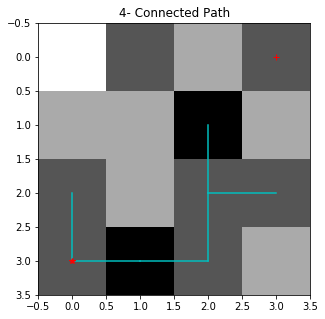

In [13]:
connected4= four_connected(V, pix)
plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')

for i in connected4:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.plot(p[1], p[0], 'r', marker= '*')
plt.plot(q[1], q[0], 'r', marker= '+')

X= []
Y= []
for i in best_path4:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.title('4- Connected Path')
plt.show()

In [14]:
best_path8= eight_path(V, pix, p, q)
if len(best_path8)==0:
    print("8-Path does not exist")
else:
    print(f"Length of shortest eight-path: {len(best_path8)-1}")

Length of shortest eight-path: 4


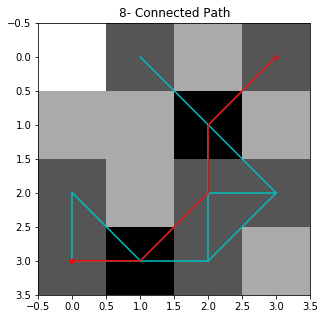

In [15]:
connected8= eight_connected(V, pix)

plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')
for i in connected8:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.plot(p[1], p[0], 'r', marker= '*')
plt.plot(q[1], q[0], 'r', marker= '+')

X= []
Y= []
for i in best_path8:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.title('8- Connected Path')
plt.show()

In [15]:
best_pathM= M_path(V, pix, p, q)
if len(best_pathM)==0:
    print("M-Path does not exist")
else:
    print(f"Length of shortest M-path: {len(best_pathM)-1}")

Length of shortest M-path: 5


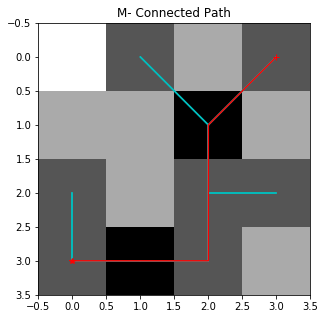

In [16]:
connectedM= M_connected(V, pix)
plt.figure(figsize= (5, 5))
plt.imshow(pix, cmap= 'gray')

for i in connectedM:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.plot(p[1], p[0], 'r', marker= '*')
plt.plot(q[1], q[0], 'r', marker= '+')

X= []
Y= []
for i in best_pathM:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.title('M- Connected Path')
plt.show()

# Image

In [17]:
import cv2

In [18]:
img_file= input("Enter image file name: ")
img= cv2.imread(img_file, 0)

Enter image file name: ./Images/maze.png


In [19]:
V_img= np.array(list(map(int, input('Enter V for image: ').split())))

Enter V for image: 255


In [20]:
p_img= tuple(map(int, input("Enter starting point: ").split()))
q_img= tuple(map(int, input("Enter ending point: ").split()))

Enter starting point: 10 10
Enter ending point: 200 280


In [21]:
best_path4= four_path(V_img, img, p_img, q_img)
if best_path4== []:
    print("4-Path does not exist")
else:
    print(f"Length of shortest 4-path: {len(best_path4)-1}")

Length of shortest 4-path: 998


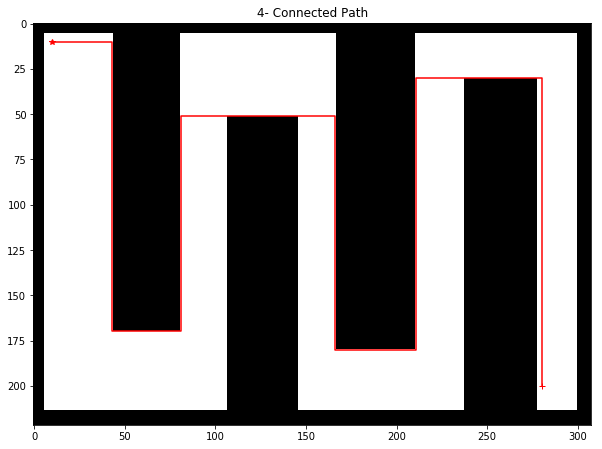

In [22]:
# c4= four_connected(V_img, img)

plt.figure(figsize= (10, 10))
plt.imshow(img, cmap= 'gray')
# for i in c4:
#     plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.title('4- Connected Path')
plt.plot(p_img[1], p_img[0], 'r', marker= '*')
plt.plot(q_img[1], q_img[0], 'r', marker= '+')

X= []
Y= []
for i in best_path4:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()

In [23]:
best_path8= eight_path(V_img, img, p_img, q_img)
if best_path8== []:
    print("8-Path does not exist")
else:
    print(f"Length of shortest 8-path: {len(best_path8)-1}")

Length of shortest 8-path: 884


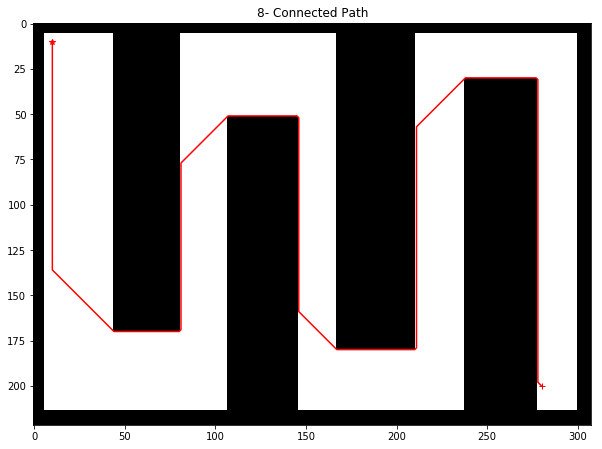

In [24]:
# c8= eight_connected(V_img, img)

plt.figure(figsize= (10, 10))
plt.imshow(img, cmap= 'gray')
# for i in c8:
#     plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.title('8- Connected Path')
plt.plot(p_img[1], p_img[0], 'r', marker= '*')
plt.plot(q_img[1], q_img[0], 'r', marker= '+')

X= []
Y= []
for i in best_path8:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()

In [25]:
best_pathM= M_path(V_img, img, p_img, q_img)
if best_pathM== []:
    print("M-Path does not exist")
else:
    print(f"Length of shortest M-path: {len(best_pathM)-1}")

Length of shortest M-path: 996


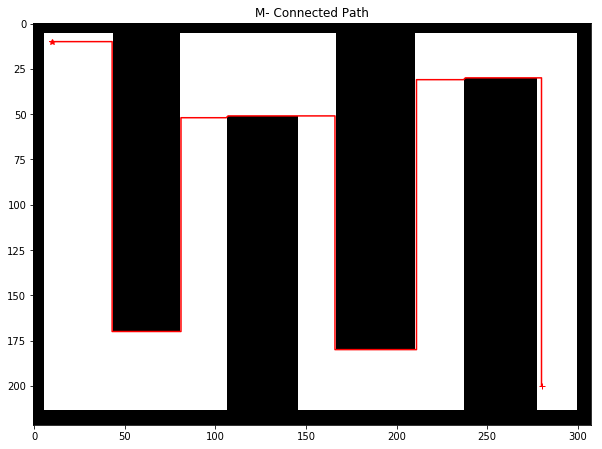

In [26]:
# cm= M_connected(V_img, img)

plt.figure(figsize= (10, 10))
plt.imshow(img, cmap= 'gray')
# for i in cm:
#     plt.plot([i[1], i[3]], [i[0], i[2]], 'c')

plt.title('M- Connected Path')
plt.plot(p_img[1], p_img[0], 'r', marker= '*')
plt.plot(q_img[1], q_img[0], 'r', marker= '+')

X= []
Y= []
for i in best_pathM:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()

In [27]:
img_file1= input("Enter image file name: ")
img1= cv2.imread(img_file1, 0)

Enter image file name: ./Images/car_gray.png


In [32]:
V_img1= np.array(list(map(int, input('Enter V for image: ').split())))

Enter V for image: 0 1 2 3 4 5 6


In [38]:
p_img1= tuple(map(int, input("Enter starting point: ").split()))
q_img1= tuple(map(int, input("Enter ending point: ").split()))

Enter starting point: 150 100
Enter ending point: 152 127


In [39]:
best_path4= four_path(V_img1, img1, p_img1, q_img1)
if best_path4== []:
    print("4-Path does not exist")
else:
    print(f"Length of shortest 4-path: {len(best_path4)-1}")

Length of shortest 4-path: 29


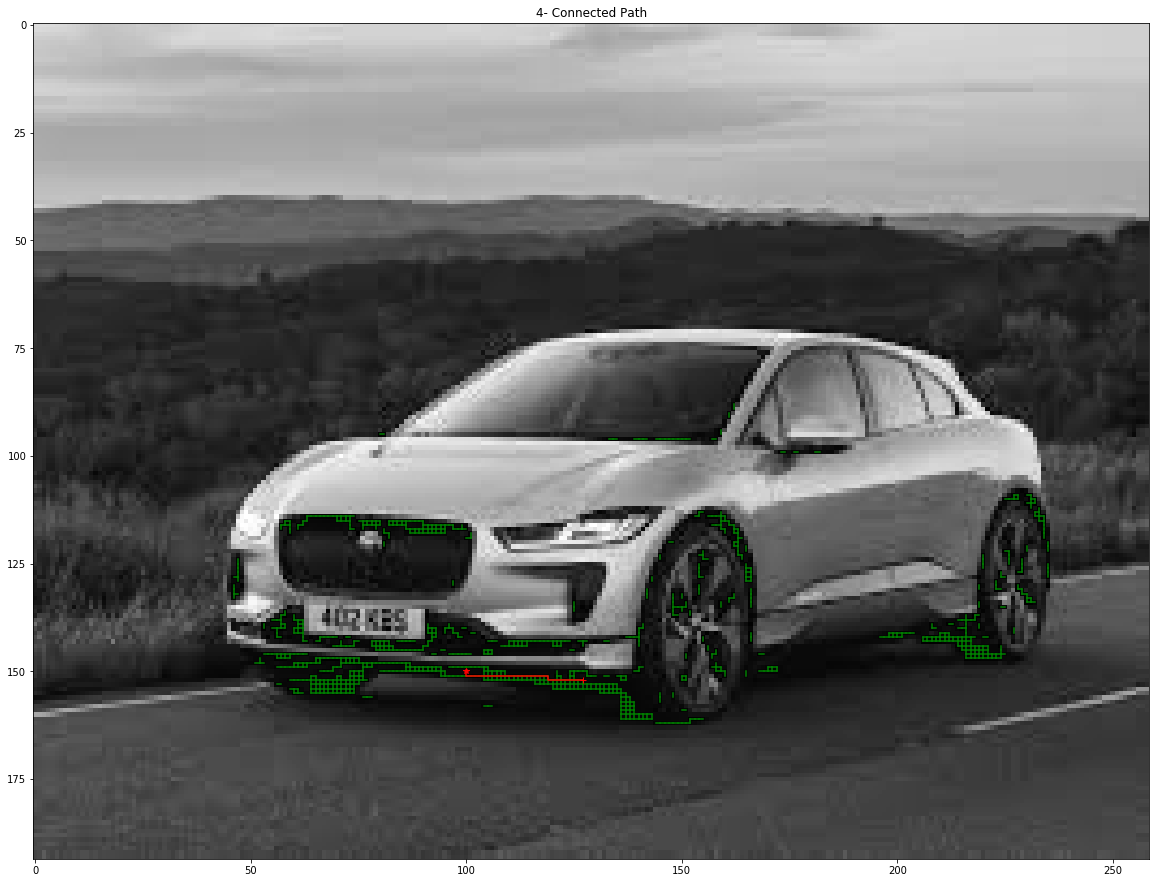

In [48]:
c4= four_connected(V_img1, img1)
plt.figure(figsize= (20, 20))
plt.imshow(img1, cmap= 'gray')
for i in c4:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'g')


plt.title('4- Connected Path')
plt.plot(p_img1[1], p_img1[0], 'r', marker= '*')
plt.plot(q_img1[1], q_img1[0], 'r', marker= '+')

X= []
Y= []
for i in best_path4:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()

In [41]:
best_path8= eight_path(V_img1, img1, p_img1, q_img1)
if best_path8== []:
    print("8-Path does not exist")
else:
    print(f"Length of shortest 8-path: {len(best_path8)-1}")

Length of shortest 8-path: 27


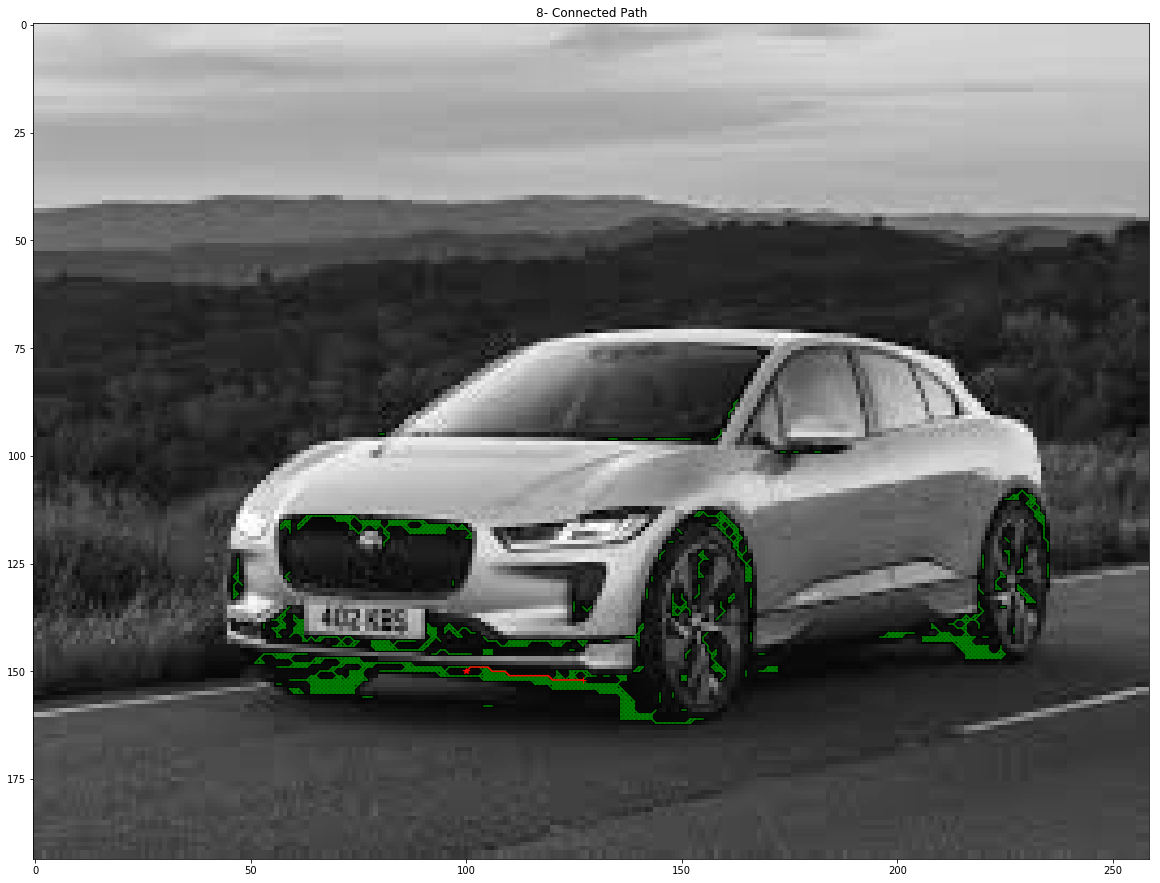

In [46]:
c8= eight_connected(V_img1, img1)
plt.figure(figsize= (20, 20))
plt.imshow(img1, cmap= 'gray')
for i in c8:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'g')



plt.title('8- Connected Path')
plt.plot(p_img1[1], p_img1[0], 'r', marker= '*')
plt.plot(q_img1[1], q_img1[0], 'r', marker= '+')

X= []
Y= []
for i in best_path8:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()

In [43]:
best_pathM= M_path(V_img1, img1, p_img1, q_img1)
if best_pathM== []:
    print("M-Path does not exist")
else:
    print(f"Length of shortest M-path: {len(best_pathM)-1}")

Length of shortest M-path: 29


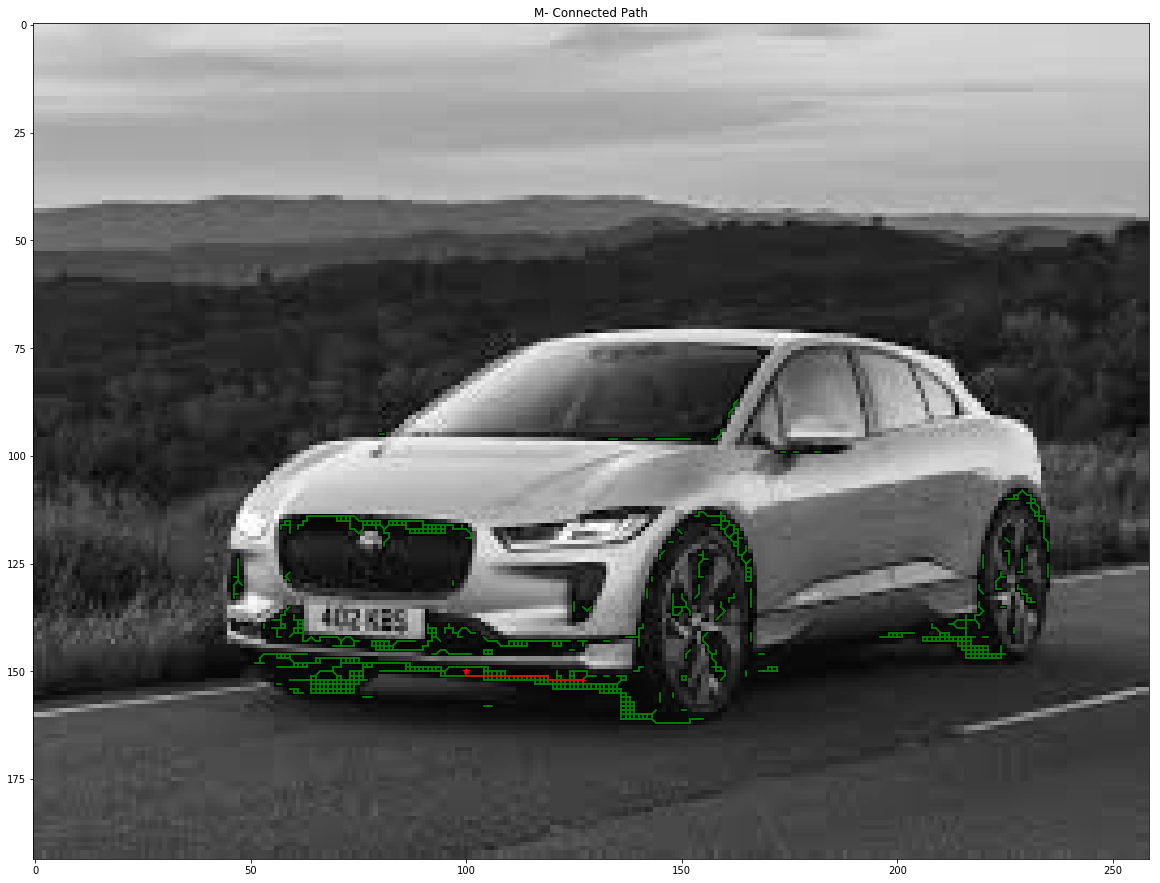

In [47]:
cm= M_connected(V_img1, img1)
plt.figure(figsize= (20, 20))
plt.imshow(img1, cmap= 'gray')
for i in cm:
    plt.plot([i[1], i[3]], [i[0], i[2]], 'g')


plt.title('M- Connected Path')
plt.plot(p_img1[1], p_img1[0], 'r', marker= '*')
plt.plot(q_img1[1], q_img1[0], 'r', marker= '+')

X= []
Y= []
for i in best_pathM:
    X.append(i[1])
    Y.append(i[0])

plt.plot(X, Y, 'r')
plt.show()